# 판다스
## 1) 시계열 - 주가 예측

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()

In [10]:
pip install pandas-datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ------------- ----------------------- 41.0/109.5 kB 653.6 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.5 kB 812.7 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.5 kB 812.7 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 576.9 kB/s eta 0:00:00


In [12]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.1/2.9 MB 409.6 kB/s eta 0:00:08
     - -------------------------------------- 0.1/2.9 MB 711.9 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.9 MB 756.6 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.9 MB 6

In [15]:
from pandas_datareader import data as pdr
import yfinance as yf

In [31]:
yf.pdr_override() # Yahoo Finance 데이터를 가져오는 데 사용되는 설정을 변경하는 역할
sp500=data.DataReader('^GSPC', start = '2018-01-01', end = '2021-12-31') # Yahoo Finance에서 S&P 500 지수 데이터를 가져오는 역할을 합니다. ^GSPC는 S&P 500 지수의 심볼
sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


In [32]:
sp500 = sp500['Close']
# 종가만 사용한다

<Axes: xlabel='Date'>

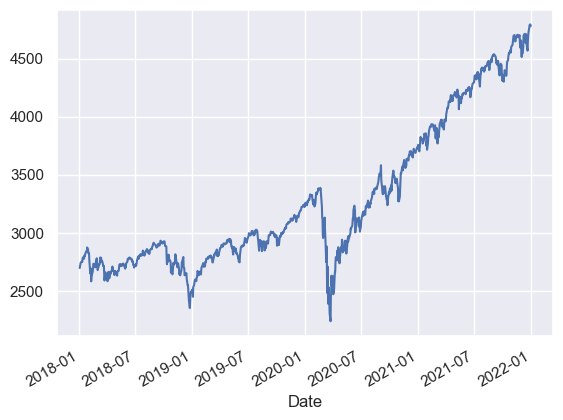

In [33]:
sp500.plot()

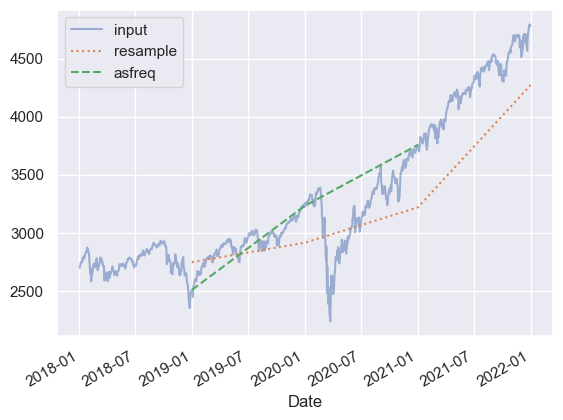

In [35]:
sp500.plot(alpha = 0.5, style = '-')

sp500.resample('BA').mean().plot(style =':')
# Business Year-End Frequency
# 비즈니스 끝"은 주로 비즈니스 일정에 따른 연도 끝을 의미하며, 주말이나 공휴일을 고려하지 않습니다
# 이 코드는 연말 주기로 데이터를 리샘플링하고 연간 평균값을 계산하여 시각화합니다.

sp500.asfreq('BA').plot(style = '--')
# 이 코드는 연말 주기로 데이터를 리샘플링하고 연간 평균값을 계산하여 시각화합니다.

plt.legend(['input', 'resample', 'asfreq'], loc = 'upper left')

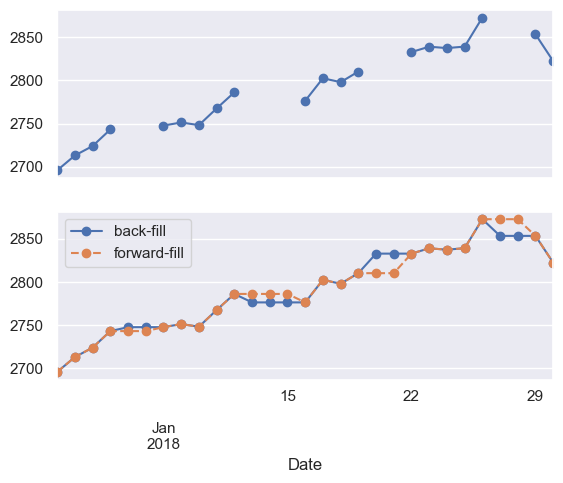

In [39]:
fig, ax = plt.subplots(2, sharex=True)
# Matplotlib를 사용하여 하나의 figure(그림)에 2개의 서브플롯(subplot)을 생성
data = sp500.iloc[:20]
# 처음 20개의 관측치를 사용하여 다양한 주기로 시각화

data.asfreq('D').plot(ax = ax[0], marker = 'o')
# data를 일별('D'는 일간을 나타냄) 주기로 리샘플링하고
# 첫 번째 서브플롯(ax[0])에 선 그래프로 표시
# 데이터 포인트를 원 형태로 표시하는 옵션

data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o')
# '뒷채우기(back-fill)' 메서드
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o')
# '앞채우기(forward-fill)' 메서드
ax[1].legend(["back-fill", "forward-fill"])
# . "back-fill"과 "forward-fill"은 각각 '뒷채우기'와 '앞채우기'를 나타내며, 어떻게 빈 값을 채웠는지를 설명하는 범례

Text(0, 0.5, '% Retrun on Investment after 1 year')

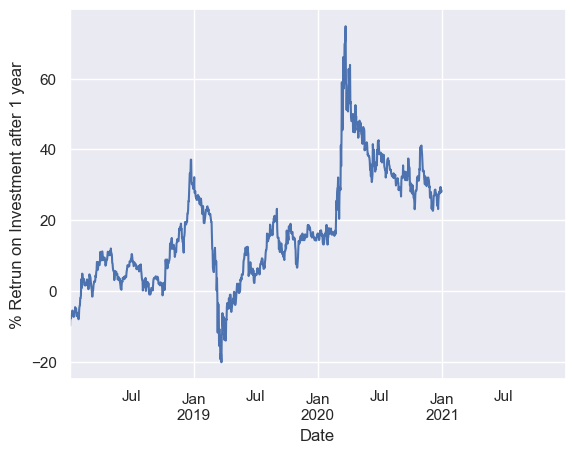

In [41]:
sp500 = sp500.asfreq('D', method = 'pad')
# method='pad'를 사용하여 빈 값을 이전 값으로 채웁니다.
# 주말 및 공휴일 등으로 누락된 데이터를 채우고, 데이터를 일별로 정렬

ROI = 100*(sp500.shift(-365) - sp500) /sp500
# 1년 후의 투자 수익률(ROI)을 계산합니다
# 현재 날짜에서 1년 후의 데이터를 가져옵니다
# 수익률은 ((1년 후 가격 - 현재 가격) / 현재 가격) * 100으로 계산

ROI.plot()
plt.ylabel('% Retrun on Investment after 1 year')

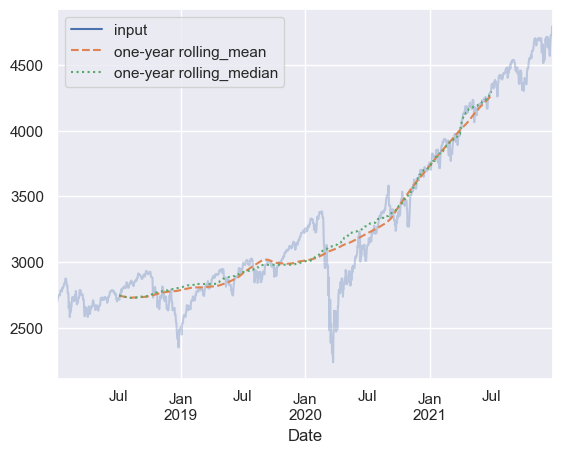

In [44]:
rolling = sp500.rolling(365, center = True)
# sp500 데이터에 대해 1년(365일) 주기로 
# 이동 평균 및 이동 중앙값을 계산하기 위한 이동 평균 객체(rolling)를 생성

data = pd.DataFrame({'input': sp500,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_median':rolling.median()})
# 이동 평균과 이동 중앙값을 포함하는 새로운 데이터프레임(data)을 생성

ax = data.plot(style = ['-', '--', ':'])
# data 데이터프레임을 사용하여 세 개의 열('input', 'one-year rolling_mean', 'one-year rolling_median')에 대한 선 그래프를 생성
ax.lines[0].set_alpha(0.3)